
## K - Means Algorithm
### What is Clustering?

CLUSTERING TASK Group/Cluster similar data points.

OBSERVATIONS Points in a cluster are close together. Points in different cluster are far away from each other.

Clustering is UNSUPERVISED LEARNING.

Algorithm(for clustering): K-means, K-means++, Hierarchical Clustering, DBSCAN


## Applications of Clustering

    E-commerce - Task is to group similar customers based on there purchasing behavior. Customer behaviour can include:
        How much money they spent
        Kind of credit card
        Kind of products they buy
        Geographical area


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [6]:
model = KMeans(n_clusters=3)
model.fit(X)

C:\Users\Banoth Sudhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Banoth Sudhar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Text(0.5, 1.0, 'K Mean Clustering')

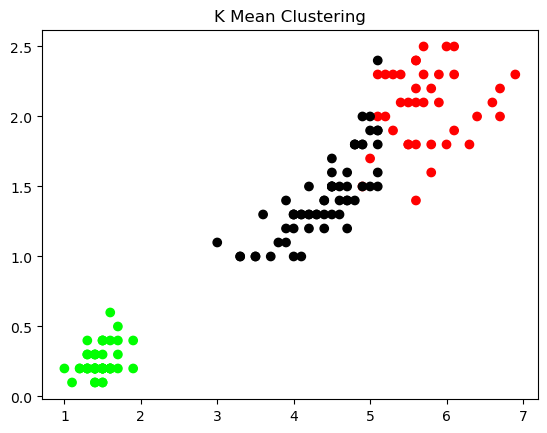

In [8]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_])
plt.title('K Mean Clustering')

##  Since we have the original class lables, lets check how accurate the KMeans is doing.

In [9]:
predict = model.predict(X)

In [10]:
Y=iris.target

In [11]:
from scipy.stats import mode
labels = np.zeros_like(predict)
for i in range(3):
    mask = (predict==i)
    labels[mask] = mode(Y[mask])[0]

C:\Users\Banoth Sudhar\AppData\Local\Temp\ipykernel_17000\252085915.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(Y[mask])[0]


In [12]:

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y, labels)

0.8933333333333333

In [13]:
confusion_matrix(Y, labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

##  Hierarchical Clustering


In [14]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Different ways to compute distance between two clusters

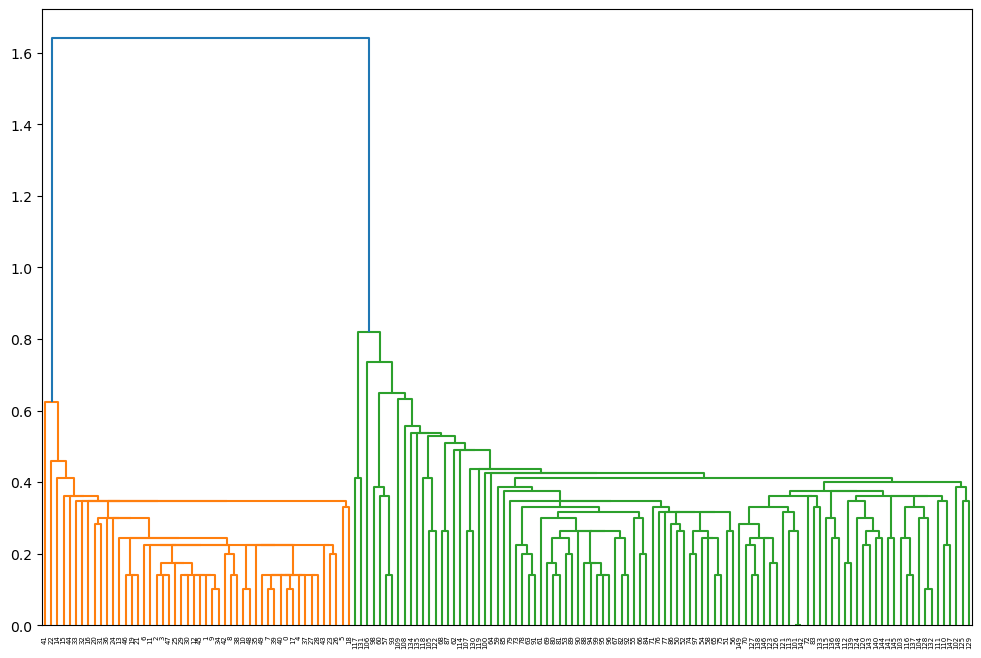

In [16]:
# Single Linkage

plt.figure(figsize=(12, 8))
mergings = linkage(X, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

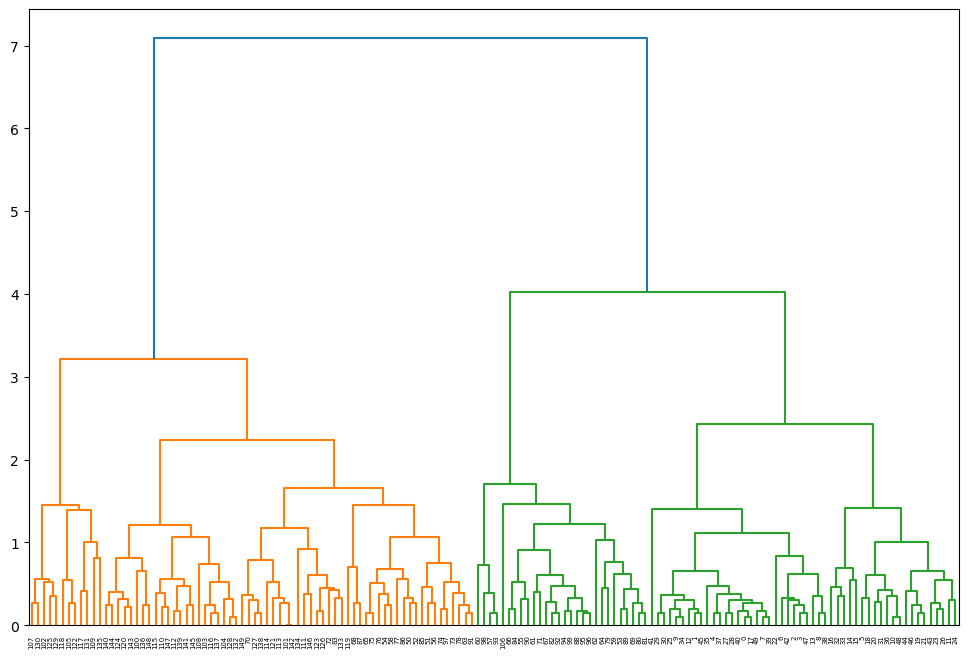

In [17]:
# Complete Linkage

plt.figure(figsize=(12, 8))
mergings = linkage(X, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [18]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
    

In [19]:
# 3 clusters

lables = cut_tree(mergings, n_clusters=3).reshape(-1, )

lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Agglomerative Clustering')

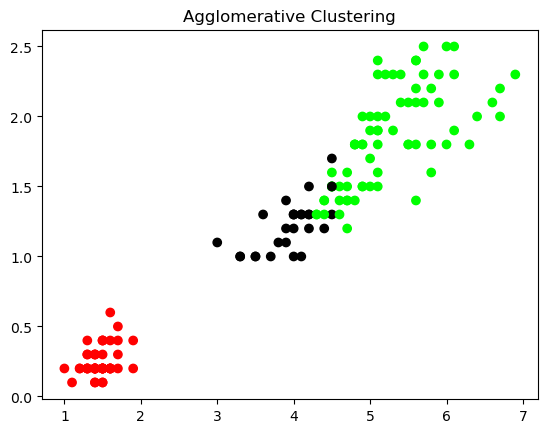

In [21]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[lables])
plt.title('Agglomerative Clustering')